In [ ]:
#@title ドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title データを保存するディレクトリのパスを指定
#@markdown ランタイムに接続しドライブを後、コピーしてくる<br>
#@markdown 後ろの / は追加するので、追記は不要<br>

cwd = "/content/drive/MyDrive/RNA-seq/Outputs/Hypoxia2" #@param {type:"string"}
cwd = cwd + "/"

# 必要なモジュールをインポートする
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# カレントディレクトリの変更
import os
os.makedirs(cwd , exist_ok = True)
os.chdir(cwd)
currentdir = os.getcwd()

In [ ]:
#@title 実験名を定義
exp_name = "Hypoxia2" #@param {type:"string"}
exp_name = exp_name + "_"

In [ ]:
#@title DEGと平均行を追加したTPMデータのパスを定義
df_tpm_path =  "/content/drive/MyDrive/RNA-seq/Outputs/Hypoxia2/Hypoxia2_DEGavetpm.csv" #@param {type:"string"}
df_tpm = pd.read_csv(df_tpm_path , index_col = 0)
print(df_tpm)

                    product      N_DC_1  ...       DEG  DEG_log2
Geneid                                   ...                    
ENSG00000000003      TSPAN6   35.429129  ...  0.996437 -0.005149
ENSG00000000005        TNMD    0.000000  ...  1.000000  0.000000
ENSG00000000419        DPM1  127.006436  ...  1.135299  0.183072
ENSG00000000457       SCYL3    6.785430  ...  1.059714  0.083674
ENSG00000000460    C1orf112    3.220708  ...  0.700542 -0.513456
...                     ...         ...  ...       ...       ...
ENSG00000285990  AL589743.7    0.000000  ...  1.000000  0.000000
ENSG00000285991  AL355312.5    0.044119  ...  0.973948 -0.038084
ENSG00000285992  AC120036.5    0.000000  ...  1.000000  0.000000
ENSG00000285993  AC018931.1    0.000000  ...  1.000000  0.000000
ENSG00000285994  AL731559.1    0.000000  ...  1.000000  0.000000

[58676 rows x 11 columns]


In [ ]:
#@title GOファイルのパスを定義
#@markdown ファイル管理の観点から、InputsフォルダにGOのデータを置き、そのファイルパスを入力する

#@markdown ドライブにある場合はファイルのパスを入力
file_path = "/content/drive/MyDrive/Colab Notebooks/QuickGO/GCLM-cellular response to leukemia inhibitory factor.tsv" #@param {type:"string"}

#@markdown ファイルの形式を選択
file_type = "tsv" #@param ["csv", "tsv"]
if file_type == "csv":
  sep_c = ","
else:
  sep_c = "\t"

df_file = pd.read_csv(file_path , sep = sep_c)

print("カラムは次の通り")
print(list(df_file))

カラムは次の通り
['GENE PRODUCT DB', 'GENE PRODUCT ID', 'SYMBOL', 'QUALIFIER', 'GO TERM', 'GO NAME', 'ECO ID', 'GO EVIDENCE CODE', 'REFERENCE', 'WITH/FROM', 'TAXON ID', 'ASSIGNED BY', 'ANNOTATION EXTENSION', 'GO ASPECT']


In [ ]:
#@title GOファイルから遺伝子が乗っている列を抽出

#@markdown 読み込んだファイルのどの列に抽出したい遺伝子が記載してあるか入力
Gene_list_column = "SYMBOL" #@param {type:"string"}

df_list = df_file.loc[: , Gene_list_column]
df_list = df_list.drop_duplicates()
df_list = df_list.sort_values(axis = 0 , ascending = False , ignore_index = True)
df_list

0                                                  cacnb4
1                                                   cPAD2
2       Zosterops lateralis melanops (silver-eye) micr...
3       Zonotrichia albicollis (white-throated sparrow...
4                                                   Zfp42
                              ...                        
1668                                           A0A0D9RU10
1669                                           A0A0D9REZ6
1670                                           A0A0D9R504
1671                                           A0A0A7HSH1
1672                                           A0A0A0RBT6
Name: SYMBOL, Length: 1673, dtype: object

In [ ]:
#@title 抽出元から遺伝子リストに載っているものを抽出する

#@markdown tomファイルから、遺伝子名が記載してあるカラム名を指定
Gene_column = "product" #@param {type:"string"}

# mergeのinnerメソッドで抽出
df_tyuusyutu = pd.merge(df_list ,
              df_tpm ,
              how = "inner" ,
              left_on = Gene_list_column ,
              right_on = Gene_column
              )

df_tyuusyutu = df_tyuusyutu.drop(Gene_list_column , axis = 1)
# df_tyuusyutu = df_tyuusyutu.drop_duplicates(subset = "product" ,ignore_index = True)

df_tyuusyutu

,product,N_DC_1,N_DC_2,N_DC_3,N_DC_ave,H_DC_1,H_DC_2,H_DC_3,H_DC_ave,DEG,DEG_log2
0,XRCC5,140.222755,161.862204,179.906355,160.663772,130.455371,139.475760,154.603598,141.511576,0.881531,-0.181917
1,WDR35,6.445000,7.669360,8.126572,7.413644,5.239007,6.369294,5.098112,5.568804,0.780732,-0.357100
2,VEGFC,50.602745,32.037130,52.930406,45.190094,72.412015,31.989928,65.186936,56.529626,1.245497,0.316722
3,UBXN2A,14.806727,16.065145,16.086563,15.652811,16.839053,15.858190,17.645349,16.780864,1.067739,0.094560
4,TWISTNB,23.201862,23.356756,31.634899,26.064506,17.665980,25.084617,26.917537,23.222712,0.894999,-0.160042
...,...,...,...,...,...,...,...,...,...,...,...
102,B3GNT2,15.387117,14.671871,18.484280,16.181089,10.249379,10.544458,15.153280,11.982372,0.755620,-0.404267
103,ARID5B,33.724984,42.092819,53.471552,43.096452,36.070694,51.210051,68.461935,51.914227,1.199966,0.262993
104,ADAM23,7.378058,11.824359,4.417246,7.873221,4.274532,7.565622,2.191695,4.677283,0.639822,-0.644257
105,ABCG4,0.285077,0.219466,0.087540,0.197361,0.224450,0.106118,0.108586,0.146385,0.957426,-0.062767


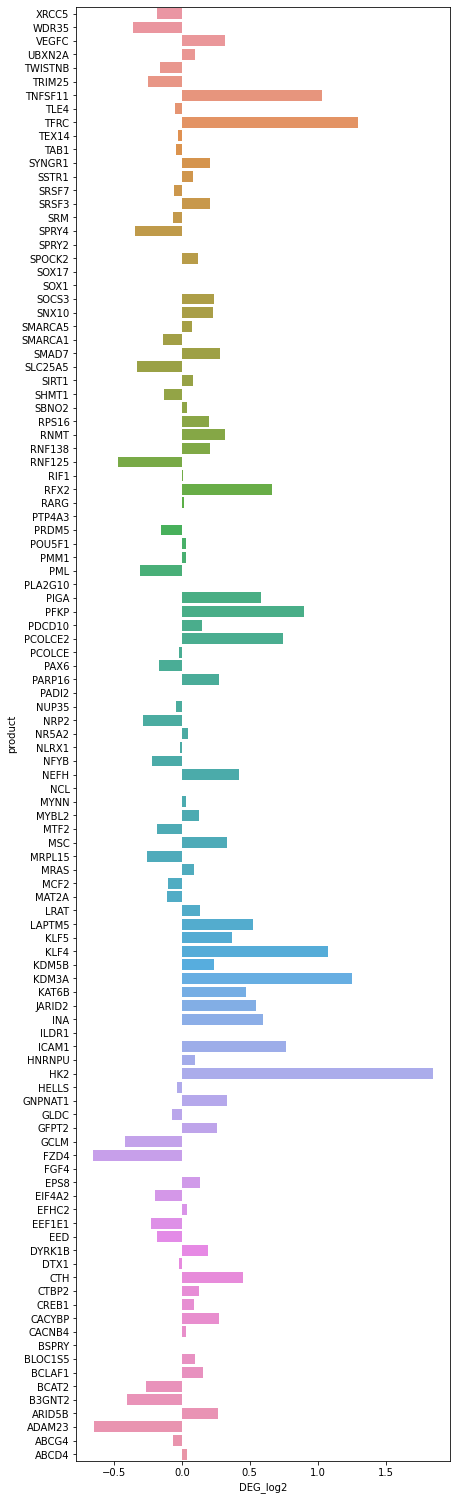

In [ ]:
#@title 抽出した遺伝子のDEG_log2値をグラフ化
plt.figure(facecolor = "white" , figsize=(len(df) / 16 , len(df) / 4))
sns.barplot(x = "DEG_log2" , y = "product" , data = df_tyuusyutu)

＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝<br>
以下では、発現変動遺伝子のTPMをグラフ化する。<br>
GOの種類によっては膨大な数となるため、適宜データを区切ったりfig属性のサイズを調整するなど手を加える事

In [ ]:
#@title N数の定義と必要データを纏めたdfの作成
n_num = 3 #@param {type:"integer"}
df = df_tyuusyutu.copy()
df

,product,N_DC_1,N_DC_2,N_DC_3,N_DC_ave,H_DC_1,H_DC_2,H_DC_3,H_DC_ave,DEG,DEG_log2
0,XRCC5,140.222755,161.862204,179.906355,160.663772,130.455371,139.475760,154.603598,141.511576,0.881531,-0.181917
1,WDR35,6.445000,7.669360,8.126572,7.413644,5.239007,6.369294,5.098112,5.568804,0.780732,-0.357100
2,VEGFC,50.602745,32.037130,52.930406,45.190094,72.412015,31.989928,65.186936,56.529626,1.245497,0.316722
3,UBXN2A,14.806727,16.065145,16.086563,15.652811,16.839053,15.858190,17.645349,16.780864,1.067739,0.094560
4,TWISTNB,23.201862,23.356756,31.634899,26.064506,17.665980,25.084617,26.917537,23.222712,0.894999,-0.160042
...,...,...,...,...,...,...,...,...,...,...,...
102,B3GNT2,15.387117,14.671871,18.484280,16.181089,10.249379,10.544458,15.153280,11.982372,0.755620,-0.404267
103,ARID5B,33.724984,42.092819,53.471552,43.096452,36.070694,51.210051,68.461935,51.914227,1.199966,0.262993
104,ADAM23,7.378058,11.824359,4.417246,7.873221,4.274532,7.565622,2.191695,4.677283,0.639822,-0.644257
105,ABCG4,0.285077,0.219466,0.087540,0.197361,0.224450,0.106118,0.108586,0.146385,0.957426,-0.062767


             N_DC_1      N_DC_2      N_DC_3  ...      H_DC_2      H_DC_3    H_DC_ave
product                                      ...                                    
XRCC5    140.222755  161.862204  179.906355  ...  139.475760  154.603598  141.511576
WDR35      6.445000    7.669360    8.126572  ...    6.369294    5.098112    5.568804
VEGFC     50.602745   32.037130   52.930406  ...   31.989928   65.186936   56.529626
UBXN2A    14.806727   16.065145   16.086563  ...   15.858190   17.645349   16.780864
TWISTNB   23.201862   23.356756   31.634899  ...   25.084617   26.917537   23.222712
...             ...         ...         ...  ...         ...         ...         ...
B3GNT2    15.387117   14.671871   18.484280  ...   10.544458   15.153280   11.982372
ARID5B    33.724984   42.092819   53.471552  ...   51.210051   68.461935   51.914227
ADAM23     7.378058   11.824359    4.417246  ...    7.565622    2.191695    4.677283
ABCG4      0.285077    0.219466    0.087540  ...    0.106118    0

<BarContainer object of 214 artists>

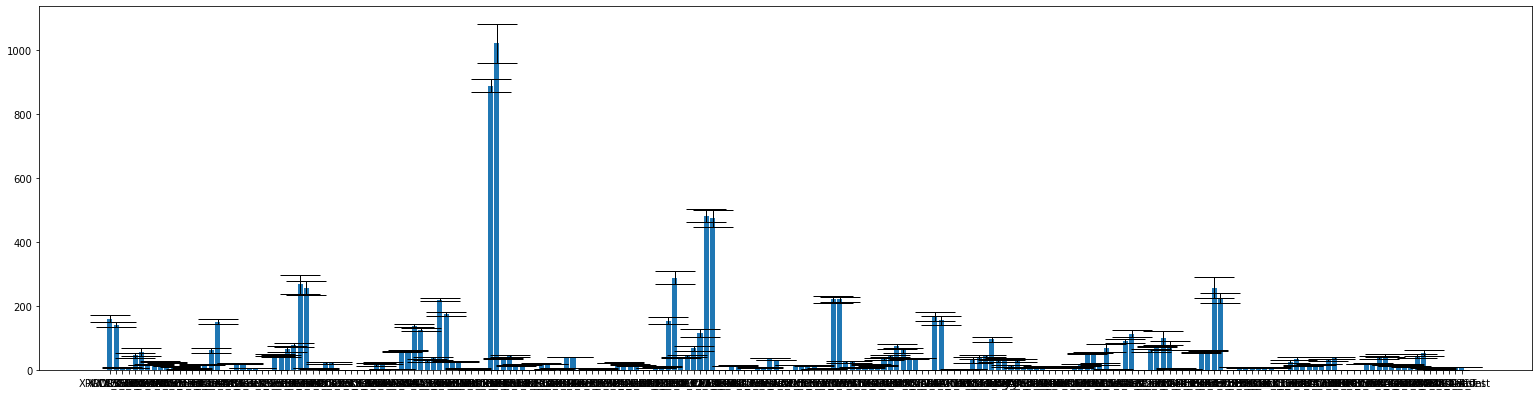

In [ ]:
#@title 平均値にエラーバー(標準誤差)をつけたグラフを描画
df_e = df.set_index("product")
df_e.drop(["DEG" , "DEG_log2"] , axis = 1 , inplace = True)

print(df_e)

# for i in range(len(df_e)):
#   if df_e.iloc[i , :].sum(axis = 0) == 0:
#     df_e.drop(df_e.index[i] , axis = 0 , inplace = True)

x = list(df_e.index)
print(x)

df_ave = df_e.iloc[: , [n_num , 2 * n_num + 1]]
df_e.drop(list(df_ave) , axis = 1 , inplace = True)
a = df_e.to_numpy().reshape(len(x) * 2 , n_num)

index_name = []
for gene in x:
  index_name = index_name + [gene + "_Cont" , gene + "_Test"]

y_mean = []
for i in range(len(df_ave)):
  y_mean = y_mean + [df_ave.iloc[i , 0] , df_ave.iloc[i , 1]]

df_e2 = pd.DataFrame(a , index = index_name ,columns = np.arange(n_num) +1)
y_sd = df_e2.std(1) / np.sqrt(n_num)
error_bar_options = {"lw":1 , "capthick":1 , "capsize": 20}

fig = plt.figure(facecolor = "white" , figsize=(len(x) / 4, len(x) / 16))
ax = fig.add_subplot()
ax.bar(index_name , y_mean , yerr = y_sd , error_kw = error_bar_options)

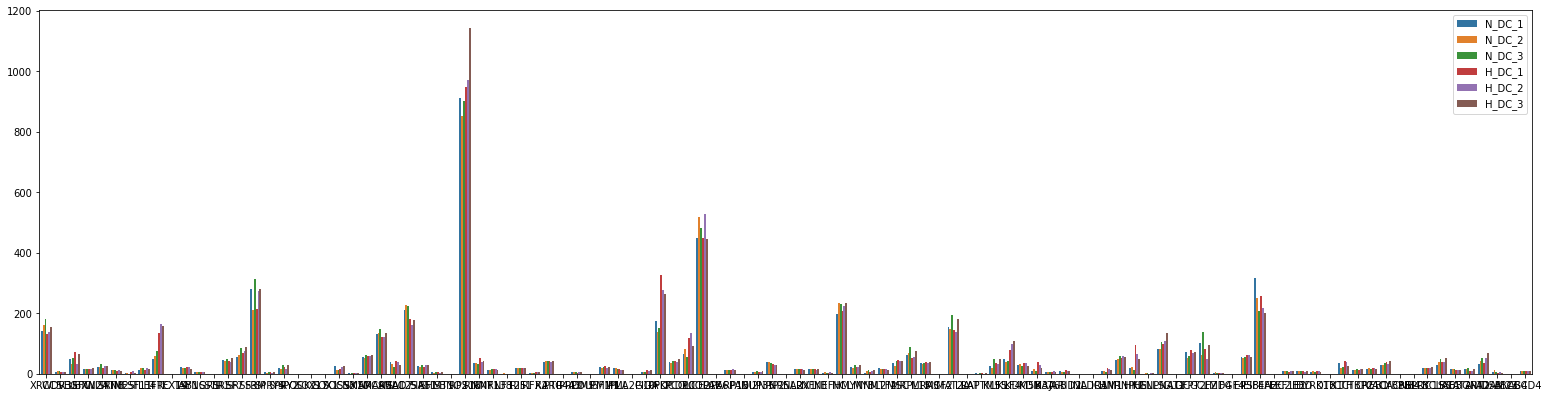

In [ ]:
#@title 平均を使わず、各データの値を比較
a = df_e.to_numpy().reshape(len(x) * 2 * n_num , 1)
b = list(df_e)

index_name = []
hue_name = []
for i in x:
  hue_name = hue_name + b
  for j in range(n_num * 2):
    index_name = index_name + [i]

fig = plt.figure(facecolor = "white" , figsize=(len(x) / 4 , len(x) / 16))
ax = fig.add_subplot()
a = a.flatten()
sns.barplot(x = index_name , y = a , hue = hue_name)